# Iris Classification

Practicing some very basic classification concepts using the [Iris Data Set](https://archive.ics.uci.edu/ml/datasets/Iris)

Pushed to GitHub to practice using git and GitHub for my GitHub review project required by Udacity.

Based on a step by step tutorial found on [machinelearningmastery](https://machinelearningmastery.com/machine-learning-in-python-step-by-step/) and Udacity's finding donors project.

In [2]:
import pandas as pd
from IPython.display import display

%matplotlib inline

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
names = ['sepal_length', 'sepal_width', 'petal_length', 'pedal_width','class']
iris_data = pd.read_csv(url, names=names)
iris_class = iris_data['class']
features = iris_data.drop('class', axis = 1)
iris_data.head()

,sepal_length,sepal_width,petal_length,pedal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
display(iris_data.describe())

,sepal_length,sepal_width,petal_length,pedal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


C:\Users\alros\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


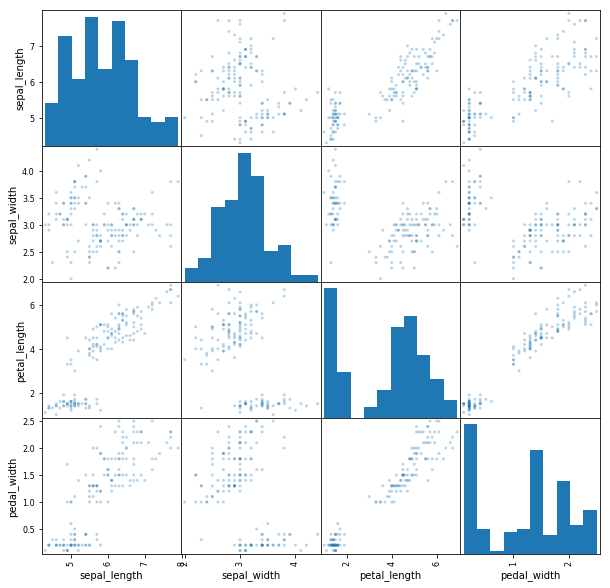

In [5]:
pd.scatter_matrix(iris_data, alpha = 0.3, figsize = (10,10));

In [94]:
from sklearn.model_selection import train_test_split

seed = 2

X_train, X_test, y_train, y_test = train_test_split(features, iris_class, test_size = 0.2, random_state = seed)

print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 120 samples.
Testing set has 30 samples.


In [95]:
#Import classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier

clf_A = LogisticRegression(random_state = seed)
clf_B = AdaBoostClassifier(random_state = seed)
clf_C = GaussianProcessClassifier(random_state = seed)
clf_D = MLPClassifier(random_state = seed)


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

for clf in [clf_A, clf_B, clf_C, clf_D]:
    kfold = KFold(n_splits=10, random_state = seed)
    clf_name = clf.__class__.__name__
    cv_results = cross_val_score(clf, X_train, y_train, cv = kfold, scoring = 'accuracy')
    print "Mean accuracy of {} is {:.4f} with a standard deviation of {:.4f}".format(clf_name, cv_results.mean(), cv_results.std())

Mean accuracy of LogisticRegression is 0.9583 with a standard deviation of 0.0768
Mean accuracy of AdaBoostClassifier is 0.9500 with a standard deviation of 0.0667
Mean accuracy of GaussianProcessClassifier is 0.9667 with a standard deviation of 0.0553
Mean accuracy of MLPClassifier is 0.9500 with a standard deviation of 0.0764


##  Classifiers to Investigate

The value for `seed` affects whether the `GaussianProcessClassifier` or the `MLPClassifier` performs best. Therefore both should be investigater and optimized.

## Investigate Performance on Testing Data with no Optimization

In [96]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

for clf in [clf_C, clf_D]:
    clf_name = clf.__class__.__name__
    clf.fit(X_train,y_train)
    predictions = clf.predict(X_test)
    print clf_name
    print accuracy_score(y_test, predictions)
    print confusion_matrix(y_test, predictions)
    print classification_report(y_test, predictions)
    

GaussianProcessClassifier
0.966666666667
[[14  0  0]
 [ 0  7  1]
 [ 0  0  8]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.88      0.93         8
 Iris-virginica       0.89      1.00      0.94         8

    avg / total       0.97      0.97      0.97        30

MLPClassifier
1.0
[[14  0  0]
 [ 0  8  0]
 [ 0  0  8]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      1.00      1.00         8
 Iris-virginica       1.00      1.00      1.00         8

    avg / total       1.00      1.00      1.00        30

